In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('house_data.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1621,54,1,False,True,False,Beryanak,830000000.0,27666.67
2337,42,1,False,True,False,NaN,640000000.0,21333.33
2872,49,1,True,True,True,Si Metri Ji,900000000.0,30000.00
2645,60,1,True,True,False,Shahryar,600000000.0,20000.00
1074,105,2,True,True,True,Pardis,950000000.0,31666.67


In [4]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [6]:
pd.options.display.float_format = '{:,.2f}'.format
df_copy = df.copy()
df_copy['Area'] = pd.to_numeric(df_copy['Area'], errors='coerce')
df_copy.dropna(inplace=True)
df_copy.reset_index(drop=True, inplace=True)

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 145.0+ KB


In [8]:
df_copy.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Room'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Price(USD)'}>]], dtype=object)

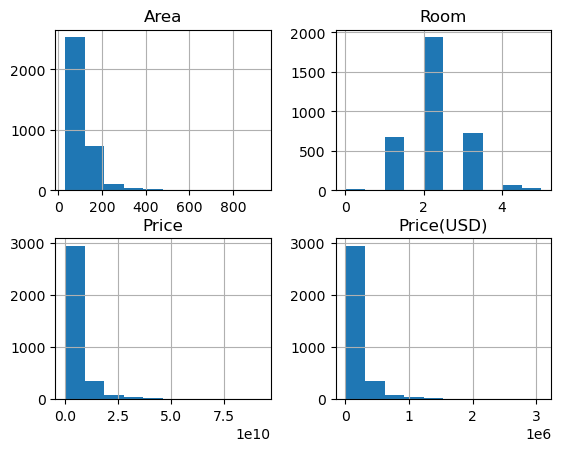

In [9]:
df_copy.hist()

In [10]:
cdf = df_copy[['Area', 'Room', 'Price']]
cdf.head()

,Area,Room,Price
0,63.00,1,"1,850,000,000.00"
1,60.00,1,"1,850,000,000.00"
2,79.00,2,"550,000,000.00"
3,95.00,2,"902,500,000.00"
4,123.00,2,"7,000,000,000.00"


In [11]:
print(cdf.skew())

Area    4.49
Room    0.62
Price   4.77
dtype: float64


In [12]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

lower_area, upper_area = lower_upper(cdf['Area'])
lower_price, upper_price = lower_upper(cdf['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower price for price: {lower_price:0.2f}")
print(f"Upper price for price: {upper_price:0.2f}")

Lower limit for area: -7.50
Upper limit for area: 196.50
Lower price for price: -5451875000.00
Upper price for price: 12871125000.00


In [13]:
area_outliers = np.where(cdf['Area'] > upper_area)
price_outliers = np.where(cdf['Price'] > upper_price)
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"number of area outliers: {len(cdf.iloc[area_outliers])}")
print(f"number of price outliers: {len(cdf.iloc[price_outliers])}")
print(f"number of outliers: {len(cdf.iloc[total_outliers])}")

number of area outliers: 238
number of price outliers: 309
number of outliers: 361


In [14]:
cdf_copy = cdf.copy()
cdf_copy.drop(total_outliers, inplace=True)
cdf_copy.reset_index(drop=True, inplace=True)
print(cdf.shape)
print(cdf_copy.shape)

(3450, 3)
(3089, 3)


In [15]:
print(cdf_copy.skew())

Area    0.67
Room    0.16
Price   1.29
dtype: float64


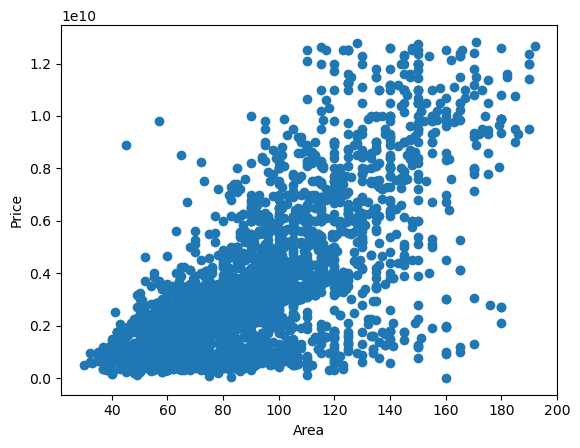

In [16]:
plt.scatter(cdf_copy['Area'], cdf_copy['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [17]:
msk = np.random.rand(len(cdf_copy)) < 0.8
train = cdf_copy[msk]
test = cdf_copy[~msk]

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

In [19]:
regr = linear_model.LinearRegression()
train_y_hat = regr.fit(train_x_poly, train_y)

print(f"Coefficients: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")

Coefficients: [[       0.         12313844.28025541   266228.41140001]]
Intercept: [-1.03079626e+08]


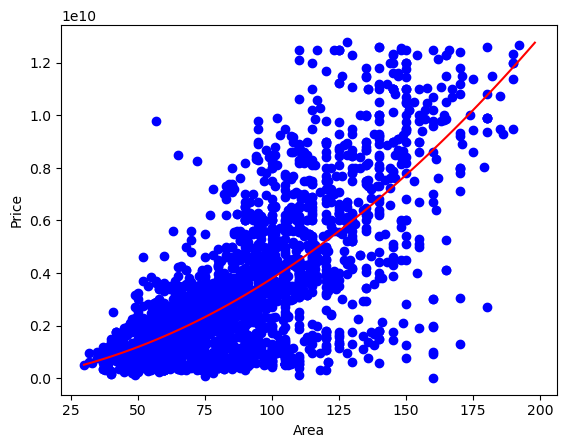

In [20]:
plt.scatter(train.Area, train.Price, color='blue')
xx = np.arange(30, 200, 3)
yy = regr.intercept_[0] + regr.coef_[0][1] * xx + regr.coef_[0][2] * np.power(xx, 2)
plt.plot(xx, yy, '-r')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [21]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_hat = regr.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_hat ) )

Mean absolute error: 1554245187.47
Residual sum of squares (MSE): 4856758638014725120.00
R2-score: 0.39
